# Liberaries 

In [955]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.feature_selection import VarianceThreshold, SelectFromModel, SelectKBest, f_classif
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [812]:
path = r'I:\Python\dataSet\ml\ercot electricity\ERCOT_dataset.csv'
main_data = pd.read_csv(path)
df = main_data.copy()
df.head(3)

,Date,ERCOT,NG1:COM,NGEU:COM,BTCUSD:CUR,TSLA:US,CL1:COM,UXA:COM,RIVN:US,CPI,...,USAENEINF,FDTR,UNITEDSTACRUOILPRO,UNITEDSTAOILEXP,WIND:IND,SOLAR:IND,NUCLEAR:IND,TMAX,TMIN,TAVG
0,4/8/24,43277.56926,1.86,29.60,71703.00,172.98,86.43,88.75,10.44,312.332,...,2.121,5.5,12533,10355.144,15.44,43.74,30.92,79,55,67
1,4/5/24,43223.97195,1.79,28.20,67638.37,164.90,86.91,90.74,10.10,312.332,...,2.121,5.5,12533,10355.144,15.29,43.13,30.54,84,46,65
2,4/4/24,43286.15326,1.77,27.78,67952.00,171.11,86.59,90.90,10.13,312.332,...,2.121,5.5,12533,10355.144,15.28,43.72,30.21,72,46,59


In [813]:
df.shape

(1276, 21)

# Feature Engineering

# Data Exploration

# DataTypes and Null Values

In [814]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1276 non-null   object 
 1   ERCOT               1276 non-null   float64
 2   NG1:COM             1276 non-null   float64
 3   NGEU:COM            1276 non-null   float64
 4   BTCUSD:CUR          1276 non-null   float64
 5   TSLA:US             1276 non-null   float64
 6   CL1:COM             1276 non-null   float64
 7   UXA:COM             1276 non-null   float64
 8   RIVN:US             1276 non-null   float64
 9   CPI                 1276 non-null   float64
 10  CO2E.KT             1276 non-null   float64
 11  USAENEINF           1276 non-null   float64
 12  FDTR                1276 non-null   float64
 13  UNITEDSTACRUOILPRO  1276 non-null   int64  
 14  UNITEDSTAOILEXP     1276 non-null   float64
 15  WIND:IND            1276 non-null   float64
 16  SOLAR:

# Statistical Information

In [815]:
round(df.describe(),1)

,ERCOT,NG1:COM,NGEU:COM,BTCUSD:CUR,TSLA:US,CL1:COM,UXA:COM,RIVN:US,CPI,CO2E.KT,USAENEINF,FDTR,UNITEDSTACRUOILPRO,UNITEDSTAOILEXP,WIND:IND,SOLAR:IND,NUCLEAR:IND,TMAX,TMIN,TAVG
count,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0,1276.0
mean,47430.6,3.5,53.2,27567.7,180.6,68.0,43.7,55.7,279.9,4858055.3,6.5,2.2,11923.0,7184.6,17.3,62.2,18.8,78.8,55.9,67.6
std,8090.1,1.9,55.7,16774.0,100.4,19.9,17.9,29.2,20.1,173374.6,16.3,2.1,852.0,2561.8,3.1,23.4,6.3,16.9,16.7,16.3
min,34247.4,1.4,3.7,4850.0,14.9,-37.6,23.8,10.1,255.5,4715691.1,-18.9,0.2,9773.0,2746.7,10.2,22.2,7.1,24.0,10.0,17.0
25%,41023.7,2.3,14.8,10838.9,82.6,55.6,29.6,24.5,259.1,4752079.3,-5.7,0.2,11307.0,5042.4,14.8,41.9,11.6,67.0,42.0,55.0
50%,45453.8,2.7,31.3,25937.7,201.8,70.9,43.9,78.0,276.6,4792247.3,-0.5,1.8,12010.0,6722.7,17.3,69.2,19.9,80.5,57.0,69.0
75%,52966.2,4.1,78.5,40167.7,251.3,80.6,51.6,78.0,299.2,4908971.4,24.5,4.5,12662.0,9468.5,19.5,79.2,23.1,92.0,71.0,82.0
max,71634.6,9.7,359.6,73157.0,410.0,119.6,106.0,172.0,312.3,5259143.8,41.6,5.5,13315.0,11664.0,26.0,121.9,32.2,112.0,84.0,98.0


In [816]:
df.set_index('Date', inplace=True)

# Distribution of Data

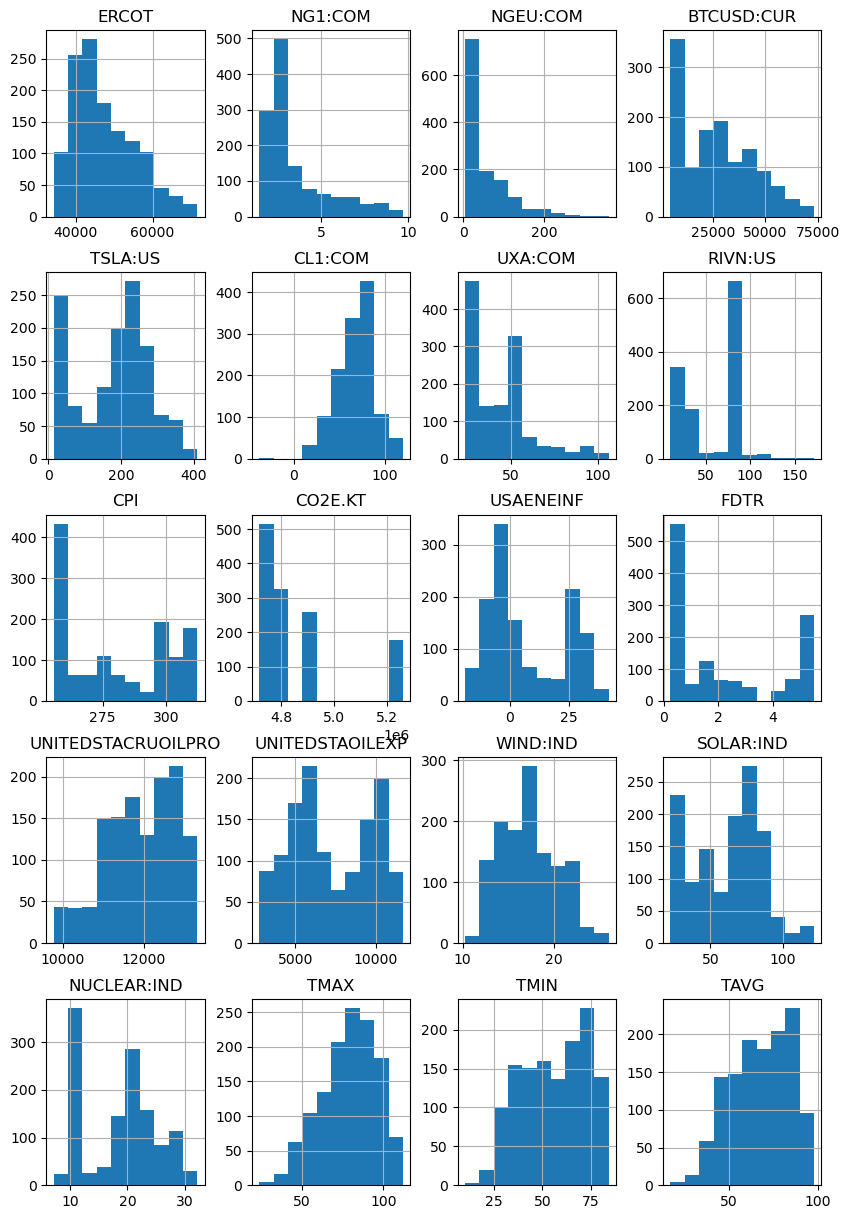

In [817]:
df.hist(figsize=(10,15))
plt.show()

In [818]:
def check_normal_distribution(df):
    plt.figure(figsize=(16, 12))
    for i in range(df.shape[1]):
        plt.subplot(5, 4, i+1)
        stats.probplot(df.iloc[:, i], dist="norm", plot=plt)
        plt.title(df.columns[i])
        plt.tight_layout()
        plt.grid(True)
    plt.show()

In [913]:
def plot_normal_distribution(df):
    plt.figure(figsize=(16, 12))
    for i in range(df.shape[1]):
        plt.subplot(5, 4, i+1)
        sns.distplot(df.iloc[:, i], hist=False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 2}, label = df.columns[i], color ="green")
        plt.tight_layout()
        plt.grid(True)

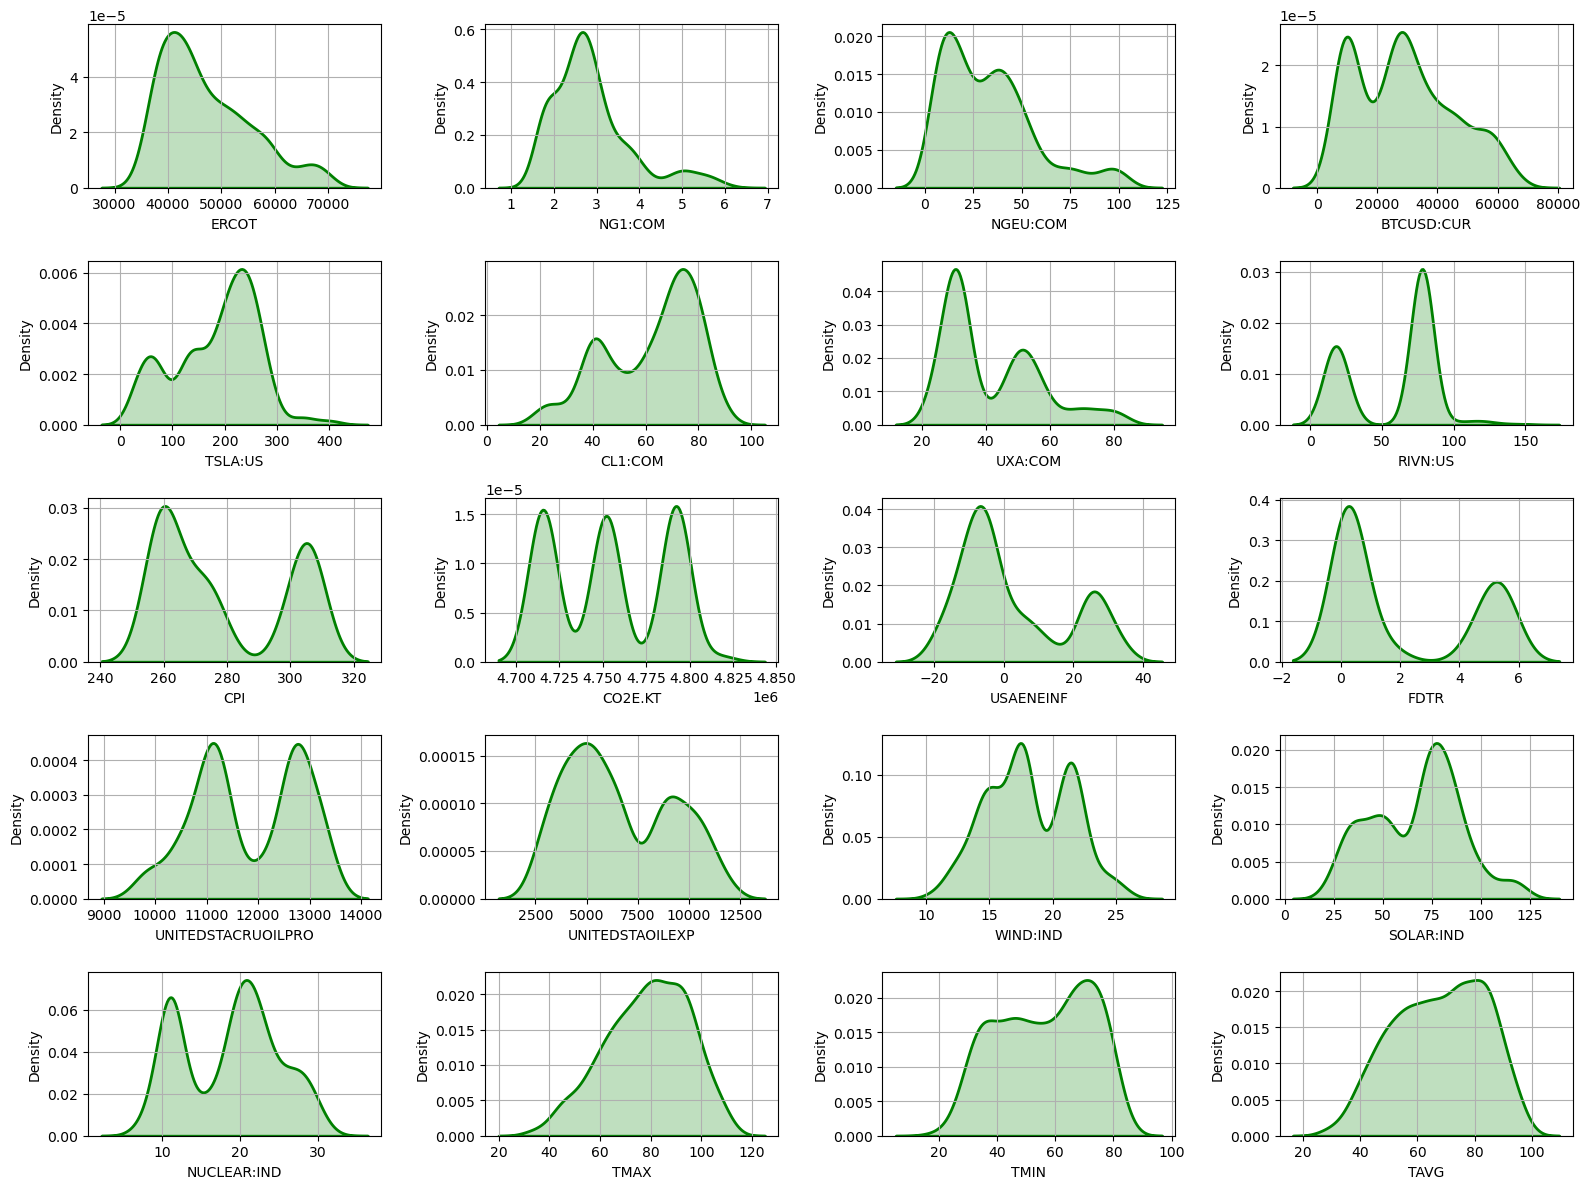

In [914]:
plot_normal_distribution(df)

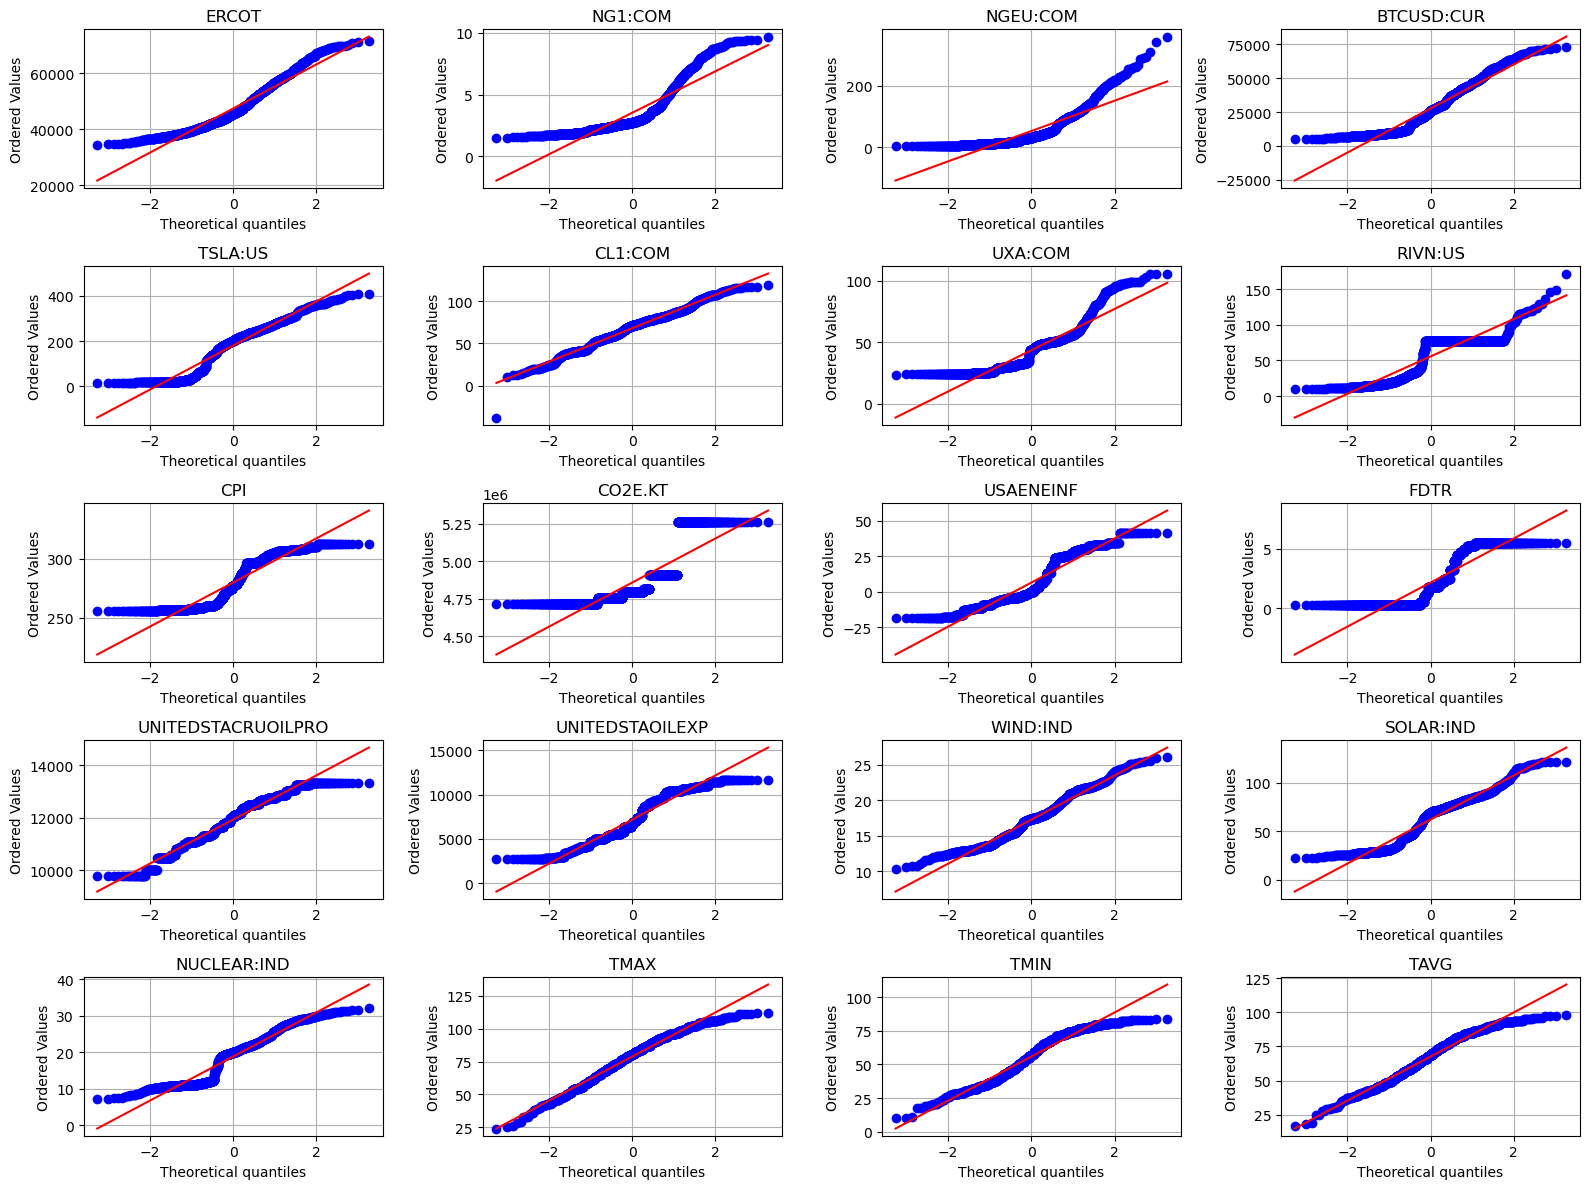

In [819]:
check_normal_distribution(df)

In [820]:
def check_normal_distribution_skew(df):
    normal = []
    right_skew = []
    left_skew = []
    for i in range(df.shape[1]):
        skew = df.skew()
        if (-0.5 < X_train.skew()[i] < 0.5):
            normal.append(df[skew.index])
            print(f'The Distribution of the {df.columns[i]} is Normal Distribution')
        elif (i > 1) | (0.5 < i < 1):
            right_skew.append(df[skew.index])
            print(f'The Distribution of the {df.columns[i]} is Right Skew')     
        elif (i < -1) | (-0.5 < i < -1):
            left_skew.append(df[skew.index])
            print(f'The Distribution of the {df.columns[i]} is Left Skew')         
    return normal, right_skew, left_skew

In [821]:
normal, right_skew, left_skew = check_normal_distribution_skew(X_train)

The Distribution of the NGEU:COM is Normal Distribution
The Distribution of the BTCUSD:CUR is Normal Distribution
The Distribution of the TSLA:US is Normal Distribution
The Distribution of the CL1:COM is Normal Distribution
The Distribution of the UXA:COM is Right Skew
The Distribution of the RIVN:US is Right Skew
The Distribution of the CPI is Normal Distribution
The Distribution of the CO2E.KT is Normal Distribution
The Distribution of the USAENEINF is Right Skew
The Distribution of the FDTR is Right Skew
The Distribution of the UNITEDSTACRUOILPRO is Normal Distribution
The Distribution of the UNITEDSTAOILEXP is Normal Distribution
The Distribution of the WIND:IND is Normal Distribution
The Distribution of the SOLAR:IND is Normal Distribution
The Distribution of the NUCLEAR:IND is Normal Distribution
The Distribution of the TMAX is Normal Distribution
The Distribution of the TMIN is Normal Distribution
The Distribution of the TAVG is Normal Distribution


# Feature Cleaning 

# Missing Values

In [822]:
df.isna().sum()

ERCOT                 0
NG1:COM               0
NGEU:COM              0
BTCUSD:CUR            0
TSLA:US               0
CL1:COM               0
UXA:COM               0
RIVN:US               0
CPI                   0
CO2E.KT               0
USAENEINF             0
FDTR                  0
UNITEDSTACRUOILPRO    0
UNITEDSTAOILEXP       0
WIND:IND              0
SOLAR:IND             0
NUCLEAR:IND           0
TMAX                  0
TMIN                  0
TAVG                  0
dtype: int64

# Outliers

In [823]:
def find_outliers_boxplot(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df = df.select_dtypes(include = numerics)
    plt.figure(figsize=(12, 12))
    for i in range(df.shape[1]):
        plt.subplot(5, 4, i+1)
        sns.boxplot(data=df, y=df.columns[i])
        plt.xlabel(df.columns[i])
        plt.tight_layout()
        plt.grid(True)

In [824]:
def find_outliers(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df = df.select_dtypes(include = numerics)
    for i in df.columns:
        Q1 = np.percentile(df[i], 25)
        Q3 = np.percentile(df[i], 75)
        IQR = Q3 - Q1
        upper = Q3 + (1.5*IQR)
        lower = Q1 - (1.5*IQR)

        inliers = df[i].ge(lower)
        df = df.loc[inliers]

        inliers = df[i].le(upper)
        df = df.loc[inliers]   
    return df

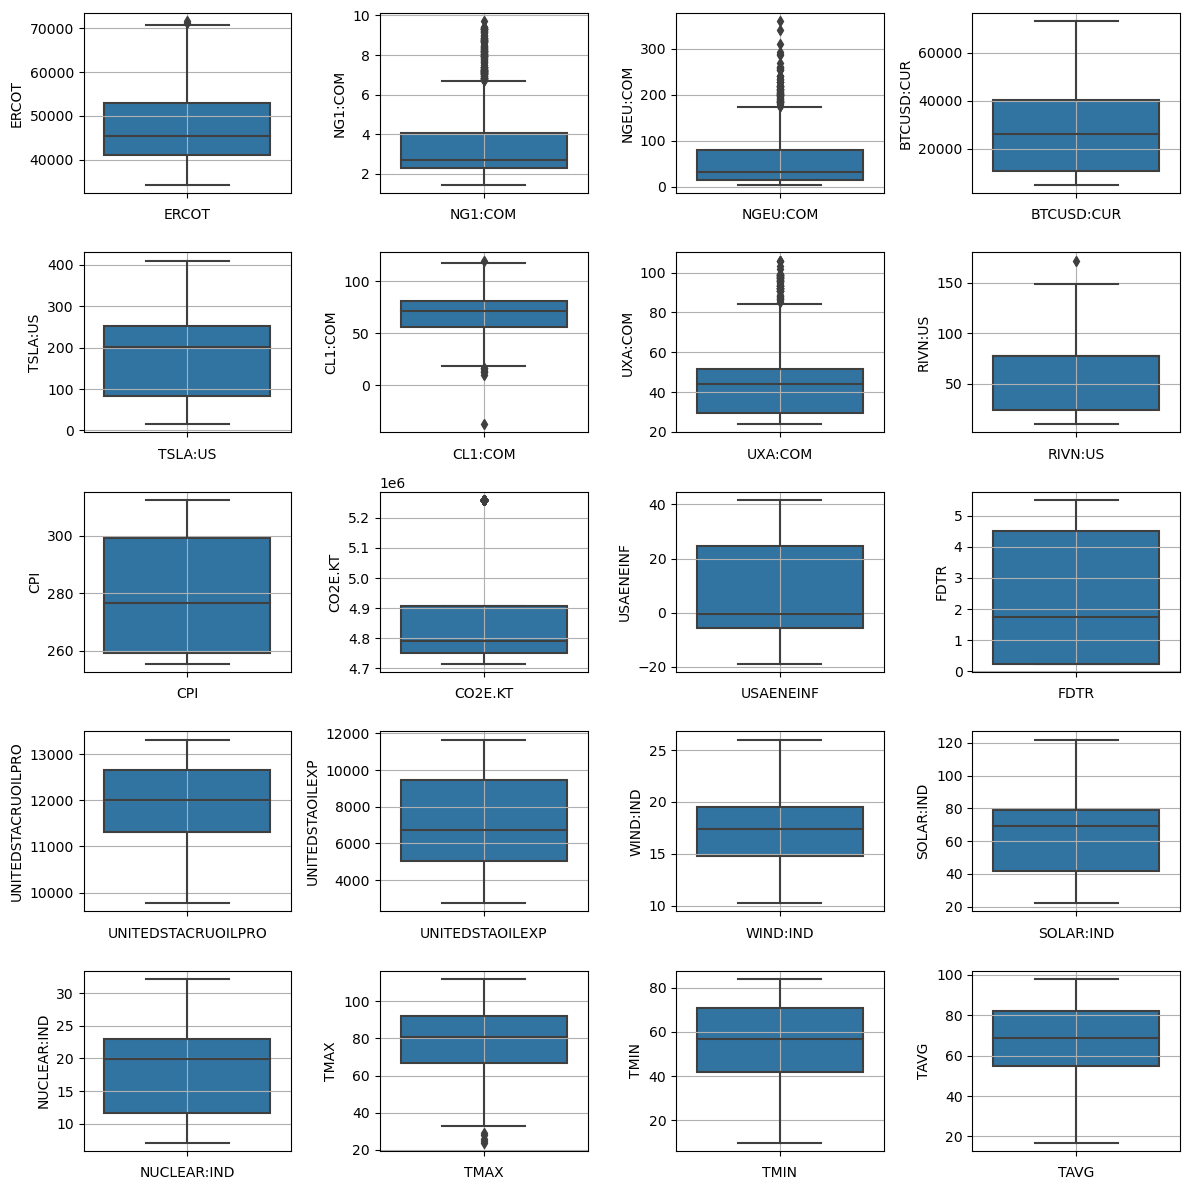

In [825]:
find_outliers_boxplot(df)

In [826]:
df = find_outliers(df)

In [827]:
df.shape

(752, 20)

# Split Data

In [828]:
X_train, X_test , y_train, y_test = train_test_split(df.drop('ERCOT', axis=1), df['ERCOT'], test_size=0.2, random_state=24)

# Feature Selection

In [829]:
X_train.shape, X_test.shape

((601, 19), (151, 19))

# Constant Features

In [830]:
selection_constant = VarianceThreshold(threshold = 0)
selection_constant.fit(X_train)

VarianceThreshold(threshold=0)

In [831]:
X_train_constant = selection.transform(X_train)
X_test_constant = selection.transform(X_test)
X_train_constant.shape, X_test_constant.shape

((601, 19), (151, 19))

# threshold = 0.01

In [832]:
selection = VarianceThreshold(threshold = 0.01)
selection.fit(X_train)

VarianceThreshold(threshold=0.01)

In [833]:
concol = [column for column in X_train_t.columns 
          if column not in X_train_t.columns[selection.get_support()]]
concol

[]

In [834]:
X_train_t = selection.transform(X_train)
X_test_t = selection.transform(X_test)
X_train_t = pd.DataFrame(X_train_t, columns=selection.get_feature_names_out())
X_test_t = pd.DataFrame(X_test_t, columns=selection.get_feature_names_out())

In [835]:
X_train_t.shape, X_test_t.shape

((601, 19), (151, 19))

# Correlation

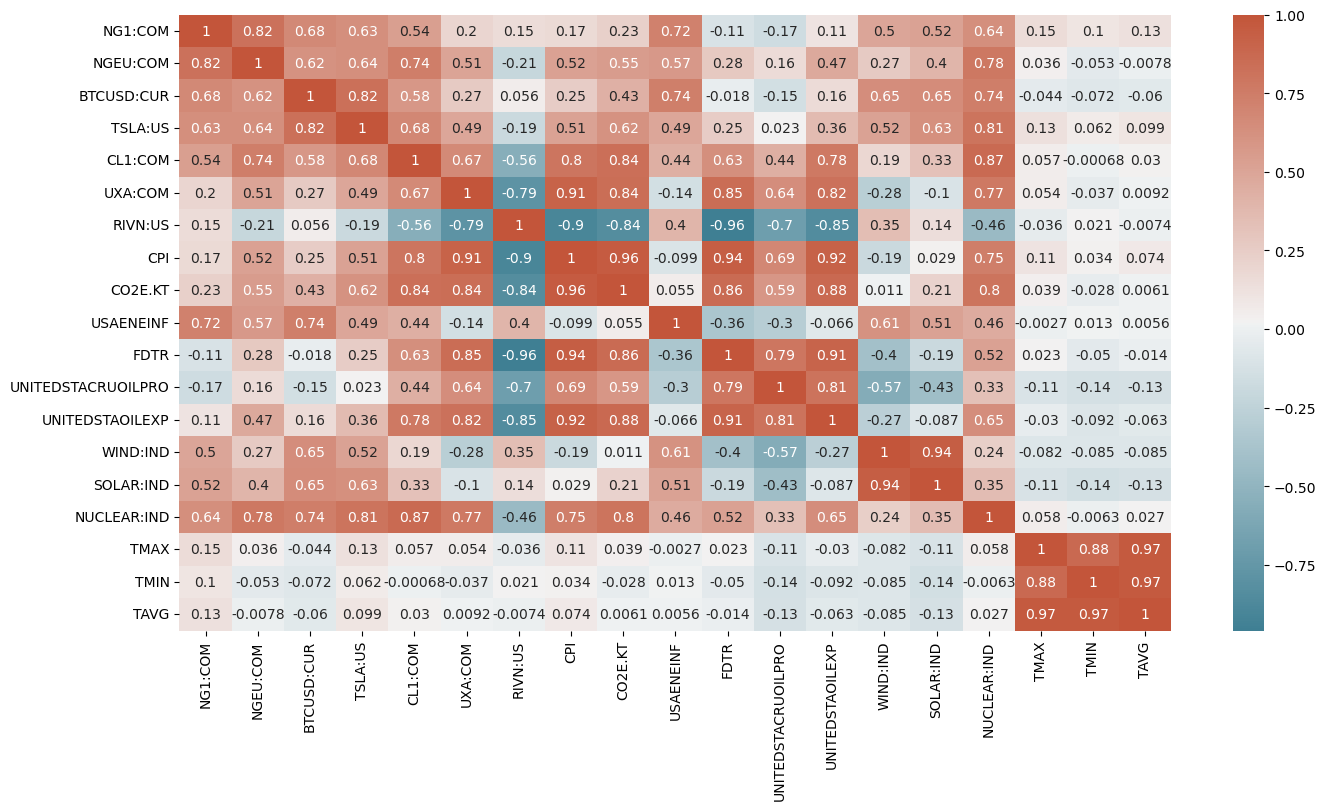

In [836]:
# the default correlation method of pandas.corr is pearson
cor = X_train.corr(method='pearson')
# To modify image size
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
# customized color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# we can make a heatmap with seaborn
sns.heatmap(cor, cmap=cmap, annot=True)
plt.show()

In [837]:
def correlation(dataset, threshold):
    # create a set where we store the correlated columns
    col_corr = set()
    # create the correlation matrix
    corr_matrix = dataset.corr()
    # for each feature in the dataset (columns of the correlation matrix)
    for i in range(len(corr_matrix.columns)):
        # check with other features
        for j in range(i):
            # if the correlation is higher than the threshold
            # (we are interested in absolute coeff value)
            if abs(corr_matrix.iloc[i, j]) > threshold:                   
                # get the name of the correlated feature
                colname = corr_matrix.columns[j]
                # and add it to our correlated set
                col_corr.add(colname)
    return col_corr

In [838]:
corr_features = correlation(X_train, 0.9)
corr_features

{'CPI', 'FDTR', 'RIVN:US', 'TMAX', 'TMIN', 'UXA:COM', 'WIND:IND'}

In [839]:
X_train_correlation = X_train.drop(labels=corr_features, axis=1)
X_test_correlation = X_test.drop(labels=corr_features, axis=1)
X_train_correlation.shape, X_test_correlation.shape

((601, 12), (151, 12))

# Correlation Feature vs Group of Features

In [840]:
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack()
corrmat = corrmat[corrmat > 0.9]
corrmat = corrmat[corrmat < 1]

In [841]:
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']

grouped_feature_ls = []
correlated_groups = []

for feature in corrmat['feature1'].unique():
    if feature not in grouped_feature_ls:
        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat['feature1'] == feature]
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block['feature2'].unique()) + [feature]
        # append the block of features to the list
        correlated_groups.append(correlated_block)
print(
    f"Found {len(correlated_groups)} correlated groups from {len(X_train)}  features.")

Found 7 correlated groups from 601  features.


In [842]:
dt = pd.DataFrame()
for i in range(6):
    dt = pd.concat([dt, correlated_groups[i]])
dt

,feature1,feature2,corr
0,UXA:COM,CPI,0.908540
1,RIVN:US,CPI,0.901753
2,RIVN:US,FDTR,0.959234
8,CO2E.KT,CPI,0.955931
12,UNITEDSTAOILEXP,CPI,0.920377
13,UNITEDSTAOILEXP,FDTR,0.906216
14,WIND:IND,SOLAR:IND,0.939685
16,TMAX,TAVG,0.969335


# Select From Model

In [848]:
sel_ = SelectFromModel(RandomForestRegressor(n_estimators=5, random_state=24))
sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(n_estimators=5,
                                                random_state=24))

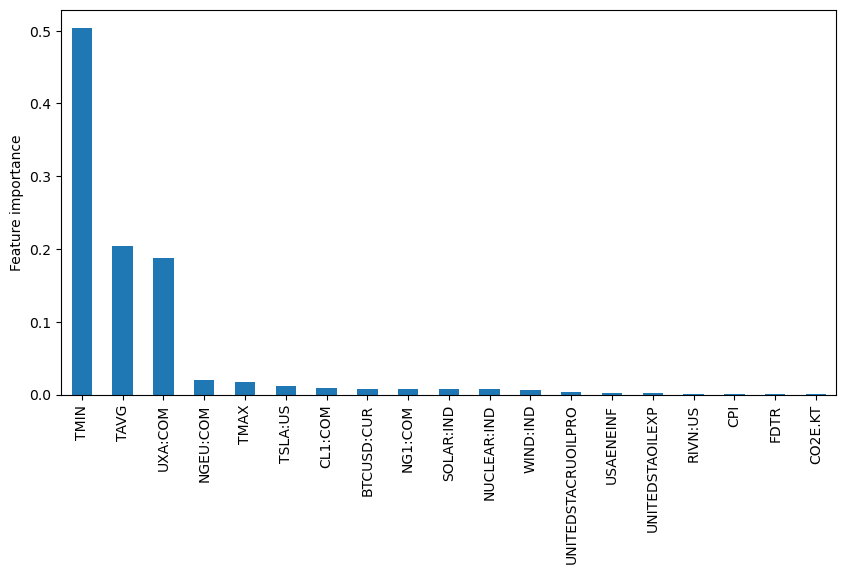

In [849]:
pd.Series(sel_.estimator_.feature_importances_.ravel(), index=X_train.columns).sort_values(ascending=False).plot.bar(figsize=(10,5))
plt.ylabel('Feature importance')
plt.show()

In [850]:
X_train_select_from_model = sel_.transform(X_train)
X_test_select_from_model = sel_.transform(X_test)

In [851]:
X_train_selected.shape, X_test_selected.shape

((526, 3), (226, 3))

# Mutual Information by Calculating Information Gain

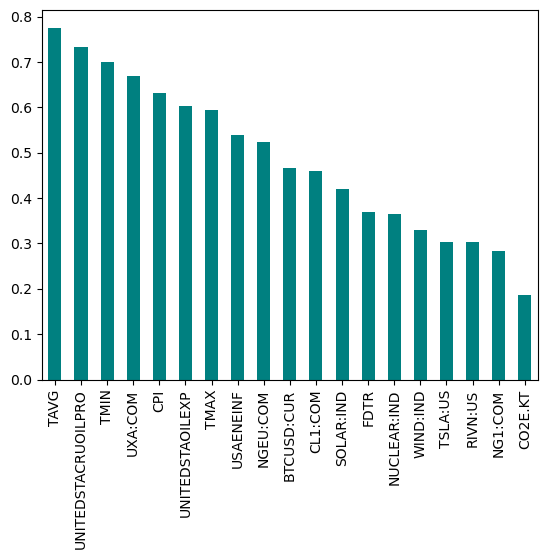

In [946]:
mutual = mutual_info_regression(X_train, y_train)
feature_mutual = pd.Series(imp, X_train.columns[0:len(X_train.columns)]).sort_values(ascending=False)
feature_mutual.plot(kind='bar', color='teal')
plt.show()

In [975]:
X_train_mutual = X_train[feature_mutual[:11].index]
X_test_mutual = X_test[feature_mutual[:11].index]

In [976]:
X_test_mutual.head()

,TAVG,UNITEDSTACRUOILPRO,TMIN,UXA:COM,CPI,UNITEDSTAOILEXP,TMAX,USAENEINF,NGEU:COM,BTCUSD:CUR,CL1:COM
Date,,,,,,,,,,,
5/13/21,58,11230,54,30.95,269.195,5551.946,61,28.547,27.83,49675.20,65.63
9/22/23,86,13053,76,60.42,307.789,10249.635,96,-0.450,42.18,26542.13,88.34
10/23/20,75,10870,63,29.25,260.388,4064.890,87,-9.195,16.17,12939.00,41.04
2/7/23,66,12462,57,50.65,300.840,8585.588,75,5.200,58.73,23197.00,76.20
6/17/21,85,11312,74,32.40,271.696,5359.621,96,24.481,30.01,38078.20,69.79


# Feature Scaling

In [977]:
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(X_train_mutual)

MinMaxScaler()

In [978]:
X_train_mutual_scaling = scaler.transform(X_train_mutual)
X_test_mutual_scaling = scaler.transform(X_test_mutual)

In [979]:
X_train_mutual_scaling.shape, y_train.shape

((601, 11), (601,))

# Linear Model

In [980]:
s = MinMaxScaler().set_output(transform="pandas")
s.fit(X_train)
x = s.transform(X_train)
xs = s.transform(X_test)

In [981]:
model = LinearRegression()
model.fit(X_train_mutual_scaling, y_train)

LinearRegression()

In [982]:
y_pred = model.predict(X_test_mutual_scaling)

In [983]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 30412545.23091249
R-squared (R2): 0.6499172095823242


* We have very small data so we expected that Score

# RandomForest Model

In [997]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000, max_depth=4, random_state=24)
RandomForestRegressorModel.fit(X_train_mutual_scaling, y_train)
#Calculating Prediction
y_pred_rf = RandomForestRegressorModel.predict(X_test_mutual_scaling)

In [998]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2):", r2_rf)

Mean Squared Error (MSE): 8551938.498139499
R-squared (R2): 0.9015575161441628


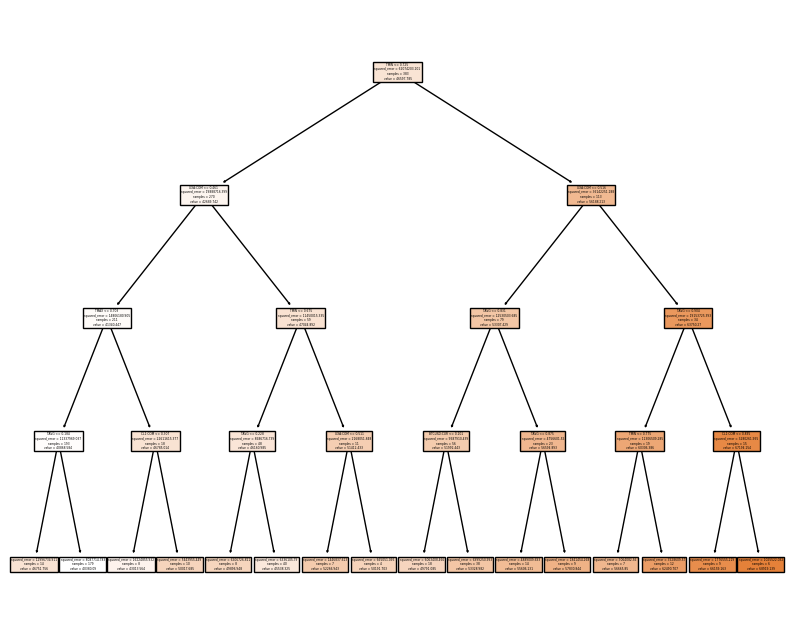

In [999]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plot_tree(RandomForestRegressorModel.estimators_[0],feature_names= list(X_train_mutual_scaling.columns), filled=True)
plt.show()